In [1]:
%matplotlib inline
import numpy as np
import os.path
from torch.utils.data import Dataset
from PIL import Image
import random
import torch
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
import cv2

In [3]:
# 随机缩放，每个batch内缩放相同
def focus_zoom(img, crop_width, method, factor=None):
    zoom_level = (factor[0], factor[1])
    iw, ih = img.size
    zoomw = max(crop_width, iw * zoom_level[0])
    zoomh = max(crop_width, ih * zoom_level[1])
    img = img.resize((int(round(zoomw)), int(round(zoomh))), method)
    return img

def random_patch_locations(focus_img, crop_width, zoom_levels, focus=True):
    loc = []
    for zl in zoom_levels:
        zoomed_img = focus_zoom(focus_img, crop_width, Image.NEAREST, zl)
        ts = transforms.Compose([transforms.ToTensor()])
        mask = ts(zoomed_img)

        s_x = random.randint(0, zoomed_img.size[0]-crop_width)
        s_y = random.randint(0, zoomed_img.size[1]-crop_width)

        if focus==True:
            while torch.min(mask[s_x:s_x+crop_width,s_y:s_y+crop_width]) == 0:
                s_x = random.randint(0, zoomed_img.size[0] - crop_width)
                s_y = random.randint(0, zoomed_img.size[1] - crop_width)
        else:
            while torch.max(mask[s_x:s_x+crop_width,s_y:s_y+crop_width]) == 1:
                s_x = random.randint(0, zoomed_img.size[0] - crop_width)
                s_y = random.randint(0, zoomed_img.size[1] - crop_width)
        loc.append([s_x, s_y])

    return loc

In [ ]:
img_img = Image.open('./image.jpg').convert('RGB')
focus_img = Image.open('./focus.jpg').convert('1')

length = 10

A_zoom = 1 / 3
zoom_levels_A = np.random.uniform(A_zoom, 1.0, size=(length // 16 + 1, 1, 2))
self.zoom_levels_A = np.reshape(np.tile(zoom_levels_A, (1, opt.batch_size, 1)), [-1, 2])

B_zoom = 1 / 3
zoom_levels_B = np.random.uniform(B_zoom, 1.0, size=(length // 16 + 1, 1, 2))
self.zoom_levels_B = np.reshape(np.tile(zoom_levels_B, (1, opt.batch_size, 1)), [-1, 2])


# 每个patch对应的位置(m,n)
self.patch_locations_A = random_patch_locations(self.focus_img, opt.crop_size, zoom_levels_A, focus=False)
self.patch_locations_B = random_patch_locations(self.focus_img, opt.crop_size, zoom_levels_A, focus=True)







torch.Size([1200, 1920])
tensor(1.)


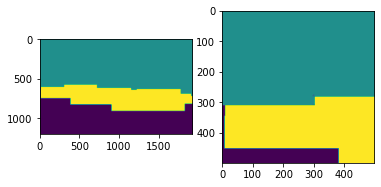

In [13]:
img = Image.open('./focus2.jpg').convert('L')
img2 = img.crop((0,300,500,800))


ts = transforms.Compose([transforms.ToTensor()])
A = ts(img).squeeze(dim=0)
print(A.shape)
print(torch.max(A))
#print(torch.max(A[0:2,13:14]).item()==1)
#print(A[0:2,10:14])
#img = img.resize((100,400))
#img = np.array(img)
#img = cv2.rectangle(img, (200,5), (535,235), (255, 0, 0), 3)
#img = cv2.resize(img, (100, 400), interpolation=cv2.INTER_CUBIC)
plt.subplot(1,2,1)
plt.imshow(img) 
plt.subplot(1,2,2)
plt.imshow(img2) 
plt.show()

torch.Size([3, 1200, 1920])
0 1919
576 1199


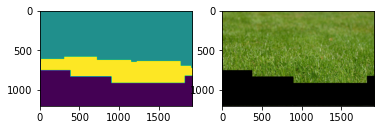

In [3]:
img = Image.open('./focus2.jpg').convert('L')
pic = Image.open('./image.jpg').convert('RGB')

ts = transforms.Compose([transforms.ToTensor()])
toPIL = transforms.ToPILImage()

A = ts(img).squeeze(dim=0)
B = ts(pic)
print(B.shape)
miny=10000000000
maxy=0
minx=10000000000
maxx=0

for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if A[i,j]==0:
            miny = min(miny, i)
            maxy = max(maxy, i)
            minx = min(minx, j)
            maxx = max(maxx, j)
print(minx, maxx)
print(miny, maxy)

#img2 = img.crop((minx,miny,maxx,maxy))
cropped = A[miny:maxy, minx:maxx]
img3 = toPIL(B[:,miny:maxy, minx:maxx])

for i in range(miny,maxy):
    for j in range(minx,maxx):
        if A[i,j]==0:
            B[0, i, j]=cropped[i-miny, j-maxx]
            B[1, i, j]=B[0, i, j]
            B[2, i, j]=B[0, i, j]

img2 = toPIL(B)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

In [40]:
x = torch.randn(4, 6)
print(x)
print(x.shape)
print(x[1:3,3:5])

tensor([[ 0.2354,  0.7736, -0.4902,  0.3931, -0.4297,  1.8712],
        [ 0.4065,  0.0164, -0.9815, -1.3099,  0.5738, -0.0342],
        [-0.6466, -1.5214, -1.1434,  1.4916, -0.1708,  2.1771],
        [-0.2385,  1.0512, -0.3021,  0.4950,  0.9766,  0.6295]])
torch.Size([4, 6])
tensor([[-1.3099,  0.5738],
        [ 1.4916, -0.1708]])


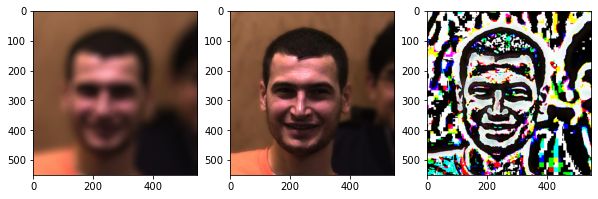

In [51]:
img1p = img1[100: 650 , 650: 1200]
img2p = img2[100: 650 , 650: 1200]
img3 = img1p - img2p
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img1p) 

plt.subplot(1,3,2)
plt.imshow(img2p) 

plt.subplot(1,3,3)
plt.imshow(img3) 
plt.show()

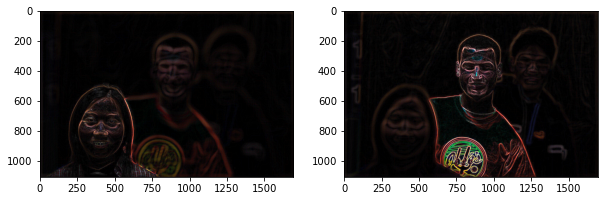

In [6]:
#image2_3 = cv2.Canny(img1,80,255) #设置80为低阈值，255为高阈值
#plt.imshow(image2_3)

x = cv2.Sobel(img1,cv2.CV_16S,1,0)  #求x方向梯度
y = cv2.Sobel(img1,cv2.CV_16S,0,1)  

absX = cv2.convertScaleAbs(x)   # 转回uint8  
absY = cv2.convertScaleAbs(y)  
  
dst1 = cv2.addWeighted(absX,1,absY,1,0) #合成

x = cv2.Sobel(img2,cv2.CV_16S,1,0)  #求x方向梯度
y = cv2.Sobel(img2,cv2.CV_16S,0,1)  

absX = cv2.convertScaleAbs(x)   # 转回uint8  
absY = cv2.convertScaleAbs(y)  
  
dst2 = cv2.addWeighted(absX,1,absY,1,0) #合成
#dst = cv2.Canny(img1, 200, 205)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(dst1)

plt.subplot(1, 2, 2)
plt.imshow(dst2) 
plt.show()

In [7]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import cv2
import matplotlib.pyplot as plt
from PIL import Image


class GaussianBlurConv(nn.Module):
    def __init__(self, channels=3):
        super(GaussianBlurConv, self).__init__()
        self.channels = channels
        # print("channels: ", channels.shape)
        kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]

        kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)    # (H, W) -> (1, 1, H, W)
        kernel = kernel.expand((int(channels), 1, 5, 5))
        self.weight = nn.Parameter(data=kernel, requires_grad=False)

    def __call__(self, x):
        x = F.conv2d(x, self.weight, padding=2, groups=self.channels)
        return x


path = r"./LHQTCj-h.jpg"
img = Image.open(path)
img = np.array(img)

img = torch.from_numpy(img).unsqueeze(dim=0).permute(0, 3, 1, 2).contiguous().float() # (1, H, W, C) -> (1, C, H, W)

gaussian = GaussianBlurConv(channels=img.shape[1])

result = gaussian(img).squeeze().permute(1, 2, 0).contiguous().numpy().astype(np.int32)	# 做高斯处理

plt.imshow(result)
plt.show()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'GaussianBlurConv'

torch.Size([5, 5])
torch.Size([3, 1, 5, 5])
torch.Size([3, 429, 429])
torch.Size([3, 429, 429])


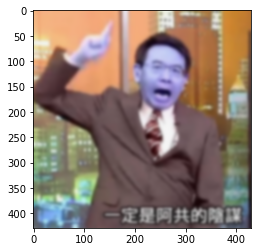

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
class GaussianBlurConv(nn.Module):
    def __init__(self, channels=3):
        super(GaussianBlurConv, self).__init__()
        self.channels = channels
        kernel = [[0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.01330373, 0.11098164, 0.22508352, 0.11098164, 0.01330373],
                  [0.00655965, 0.05472157, 0.11098164, 0.05472157, 0.00655965],
                  [0.00078633, 0.00655965, 0.01330373, 0.00655965, 0.00078633]]
        print(torch.FloatTensor(kernel).shape)
        kernel = torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0)
        kernel = np.repeat(kernel, self.channels, axis=0)
        print(kernel.shape)
        self.weight = nn.Parameter(data=kernel, requires_grad=False)
    def __call__(self, x):
        re_pad = nn.ReflectionPad2d(2)
        x = re_pad(x.unsqueeze(0))
        x = F.conv2d(x, self.weight, padding=0, groups=self.channels)
        # x = F.conv2d(x.unsqueeze(0), self.weight, padding=2, groups=self.channels)
        return x.squeeze(0)
 
input_x = cv2.imread("./LHQTCj-h.jpg")
input_x = Variable(torch.from_numpy(input_x.astype(np.float32))).permute(2, 0, 1)
gaussian_conv = GaussianBlurConv()
out_x = gaussian_conv(input_x)
for i in range(10):
    out_x = gaussian_conv(out_x)
print(input_x.shape)
print(out_x.shape)
#out_x = gaussian_conv(out_x)
#out_x = out_x.squeeze(0).permute(1, 2, 0).data.numpy().astype(np.uint8)
out_x = out_x.permute(1, 2, 0).data.numpy().astype(np.uint8)

plt.imshow(out_x)
plt.show()